500
1000
1500
2000
2500
3000


KeyboardInterrupt: 

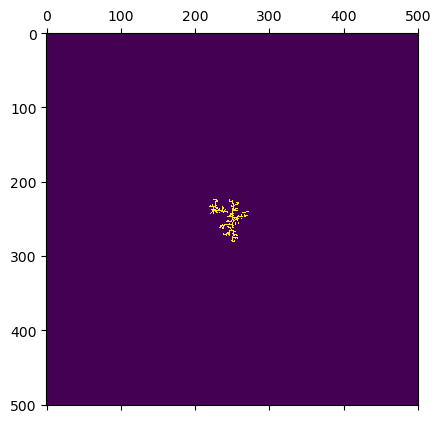

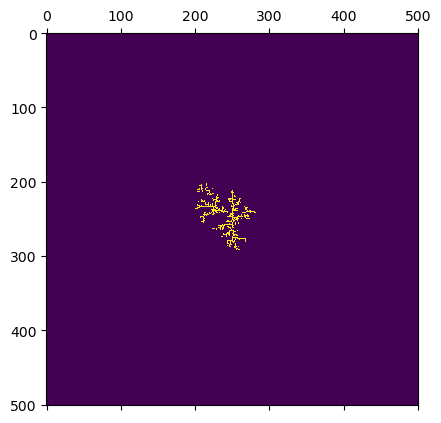

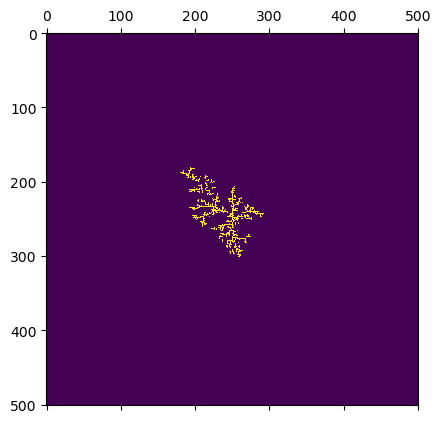

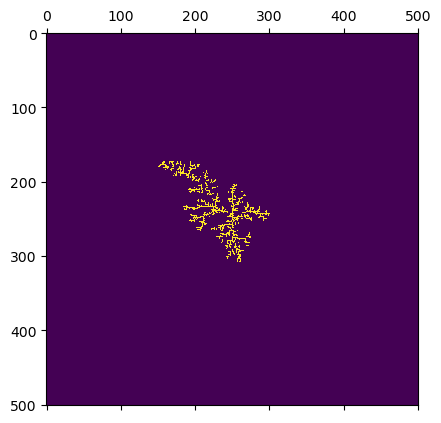

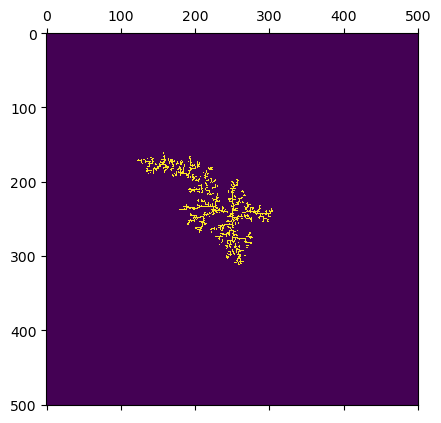

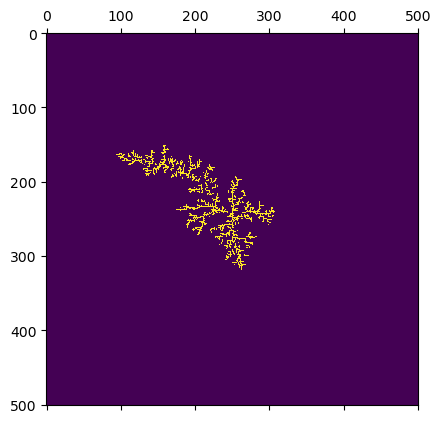

In [1]:
#******************************************************************************************
#	 Title:  	program.py
# 	 Date:		1/30/2025   
#    Class:     PHYS 4130
#	
#	Purpose:    Make random diffussion structure
#******************************************************************************************





#import libraries
import Functions_with_sticky
import numpy as np
import random as ran
import math
import matplotlib.pyplot as plt
from PIL import Image

#Set Important Variables
ArraySize=500                                                         #Matrix Size
Size = 5000                                                              #Total Particles                                                                    
MaxArm = 0                                                              #Set longest arm length to zero
CreationRadius = 5                                                     #Creation radius will start at 10 units
DeathRadius= CreationRadius + 1                                     #Death Radius will start 20 units larger than creation ring
rng = np.random.default_rng()

#Create a array to represent a 2D space with a stationary particle at the center
Functions_with_sticky.CreateArray(ArraySize)                                        


#Loop until the structure has "Size" number of particles
while Functions_with_sticky.NotFull(Size) == True:      

    #Creates a new particle 
    Functions_with_sticky.CreateParticle(CreationRadius)
    Distance=CreationRadius
    Attached = False

    #Move particle until it attaches or goes out of bounds
    while not Attached and Distance < DeathRadius**2:

        #Determine if particle is attatched 
        Attached = Functions_with_sticky.CheckAttached()

        #if particle is not attached, move particle.
        if Attached == False:
            #roll rand walk direction
            moveDir = rng.integers(0,4)
            #move particle
            Functions_with_sticky.move(moveDir)
            Distance = Functions_with_sticky.dis() 

        #if particle is attached properly attach it    
        else:
            Functions_with_sticky.increment()
            #Adjust MaxArm length and creation radius
            ArmLength = Distance
            if ArmLength > MaxArm**2:
                MaxArm = math.sqrt(ArmLength)
                CreationRadius = 5 + MaxArm
                DeathRadius = 1 + CreationRadius 

    if Distance >= DeathRadius**2:
        Functions_with_sticky.des()



In [ ]:
#Functions.ShowStructure()
#plt.savefig("")